In [ ]:

import math  
import numpy as np   
import random  as rd
import matplotlib.pyplot as plt  
from matplotlib import colors
import numba  
from numba import njit  
import time  
from matplotlib.pyplot import figure

from numba.typed import List   
from collections import defaultdict   
import random as rd

from scipy.sparse import csr_matrix
from scipy import linalg


In [ ]:
n1=200
n2=300
r=10
ratio = 0.3
def  create_fake_data():
    K= np.random.rand(n1, r)
    L= np.random.rand(r, n2)
    return K@L
M = create_fake_data()
# Omega  =  [ ]
p = round(n1*n2*ratio)
# for i in range(p):
#     Omega.append( [ rd.randint (0, n1-1),rd.randint (0, n2-1) ])
# Omega =  np.array (Omega, np.int_)

def get_m_random_index_of_matrix(n_1, n_2, m):
    return rd.sample([(i, j) for i in range(n_1) for j in range(n_2)], m)
Omega = np.array(get_m_random_index_of_matrix(n1, n2, p))

b = np.empty( (p), np.float_)
for i in range(p):
    b[i] = M[Omega[i,0], Omega[i,1]]

In [ ]:
max(M.flatten())

5.374759519858291

In [ ]:
index = [  o[0]*n2+ o[1] for o in Omega]
index
A= csr_matrix(([1]*p, (range(p),index)), shape=(p, n1*n2)  )
A_T=  A.T

In [ ]:
A.shape

(18000, 60000)

In [ ]:
A_T.shape

(60000, 18000)

In [ ]:
AA_T =A@A_T
A_TA =A_T@A
A_Tb  =  A_T@b
mu0= np.linalg.norm(A_Tb)

In [ ]:
A_Tb.shape

(60000,)

In [ ]:
# X = A_Tb.reshape(n1,n2)
# a = np.linalg.matrix_rank(X)
# a

In [ ]:
def vec_to_mat_X(X):
    return np.reshape(X, (n1, n2))

In [ ]:
z=np.random.rand ( (n1*n2))
def nablaf_2(z):
    return A_TA@z- A_Tb
def compute_y_n( z, beta):
    return z-(1/beta)*nablaf_2(z)
nablaf_2(z)

array([ 0.        ,  0.        ,  0.        , ...,  0.        ,
       -1.07956155, -1.97841012])

In [ ]:
z  

array([0.14675457, 0.03167748, 0.21473701, ..., 0.85583502, 0.7224015 ,
       0.89707988])

In [ ]:
def proximal(Z, l_k,mu):
    tau = mu/l_k
    Z = np.reshape(Z, (n1, n2))
    U,Sigma,V = linalg.svd(Z)
    print("Sigma",Sigma)
    plt.scatter(Sigma,[1]*len(Sigma), c="blue")
    plt.show()

    full_sigma  = np.zeros( (n1,n2), np.float_)

    for i in range(len(Sigma)):
        if Sigma[i]>tau:
            full_sigma[i][i] = Sigma[i]-tau

    print("full_sigma",full_sigma.flatten())
    
    plt.scatter(full_sigma.flatten(), [1]*len(full_sigma.flatten()),c ="red")
    plt.show()
    return ((U@full_sigma)@V).flatten()

In [ ]:
z.shape

(60000,)

In [ ]:
def main_loop(z, beta=1, mu=0.0001*mu0, loop_size=1000):
    t=np.zeros( (loop_size), np.float_)
    t[0]=1
    
    Xold = proximal(z, beta,mu)
    X = Xold
 
    mu1 = mu0
    for n in range(loop_size-1):

        t[n+1]= (math.sqrt(4*t[n]*t[n]+1)+1)/2
        
        lambda_loop = (t[n]-1)/t[n+1]

        mu1= max(mu1*0.7, mu)
        
        Y = X+ lambda_loop*(X-Xold)

        Xold = X

        Z = Y - (1/beta)*nablaf_2(Y)
        
        X = proximal(Z, beta,mu1)
        
        print(n,"error",np.linalg.norm(vec_to_mat_X(X)-M)/ np.linalg.norm(M))

        stop_condition = abs(np.linalg.norm(A@ X - b ) - np.linalg.norm(A @ Xold -b)) / (max(1, np.linalg.norm(b)))
        print(stop_condition)
        if abs(np.linalg.norm(A@ X - b ) - np.linalg.norm(A @ Xold -b)) / max(1, np.linalg.norm(b)) < 5e-6:
            print("sovonglap:",n)
            break

    return X

Sigma [122.55576857   8.7942       8.73331305   8.65566475   8.59856231
   8.54325686   8.47134605   8.39083945   8.25593122   8.21420161
   8.11766594   8.10849283   8.04614681   7.97266615   7.83579997
   7.79867491   7.75039103   7.72881027   7.65305256   7.57049055
   7.47998793   7.4753622    7.42911729   7.39582352   7.33314492
   7.30274622   7.27117661   7.20991654   7.1761691    7.12798127
   7.07177734   7.03837373   6.97800046   6.89388307   6.85686842
   6.82417229   6.80749298   6.77476899   6.73012257   6.70212419
   6.67519295   6.59724627   6.58895839   6.47169951   6.42593791
   6.40648039   6.38868589   6.34873004   6.3122729    6.27790341
   6.24626704   6.21170081   6.16904162   6.1192415    6.07452718
   6.03131426   6.02538987   5.93738962   5.88667622   5.87603429
   5.82878286   5.76441984   5.72914527   5.69503298   5.65985262
   5.59426776   5.56761245   5.55819824   5.47741483   5.4319715
   5.40767504   5.38220926   5.35660054   5.2985452    5.26582413
   5.

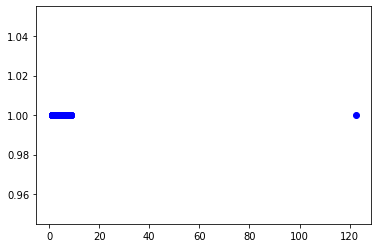

full_sigma [122.52106213   0.           0.         ...   0.           0.
   0.        ]


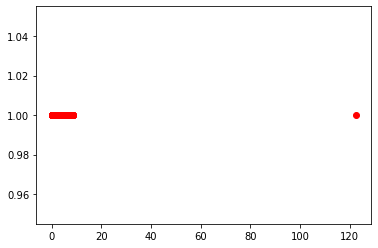

Sigma [273.8493783   34.14141151  33.90767591  33.62460071  32.88030496
  32.19071142  31.70676963  31.31820712  30.62934817  30.58071641
  30.49319643  29.90069613  29.61195238  28.97423058  28.75634961
  28.47007925  28.19292593  27.99546195  27.8315847   27.5911551
  27.36330128  27.14488022  26.60394757  26.53843602  26.47730279
  25.9750564   25.94083195  25.63146659  25.49714891  25.28920955
  25.18601705  24.69022725  24.5093116   24.39385449  24.30020915
  23.93076189  23.85526834  23.49026643  23.41801643  23.34474165
  23.14442848  22.93417584  22.80695882  22.63431853  22.49151033
  22.32908891  22.09500044  21.97111764  21.71681298  21.63488386
  21.47812879  21.20696099  21.09663554  20.85783132  20.76346538
  20.46859978  20.38358569  20.22288945  20.05838008  19.91293952
  19.77337924  19.68639948  19.59850958  19.40947364  19.29728755
  18.98052127  18.93052677  18.79330672  18.54399817  18.40025106
  18.10010732  18.05818019  17.99510259  17.92154616  17.73432311
  17.

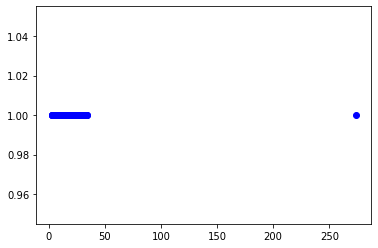

full_sigma [30.9042905  0.         0.        ...  0.         0.         0.       ]


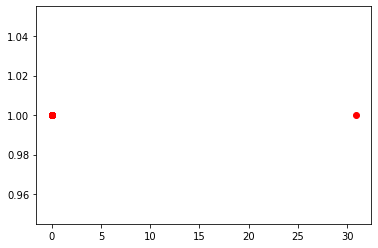

0 error 0.9519239624740574
0.1283277126230569
Sigma [195.33224584  39.37572953  38.76121575  38.42218084  37.71633283
  36.99297896  36.7266009   35.90592224  35.79096954  35.41674369
  34.8543641   34.70376605  34.42776732  33.84573747  33.54015712
  33.37665346  33.04419775  32.66131986  32.29042748  32.0195673
  31.92413436  31.76770279  31.42238377  30.69151781  30.5223573
  30.38562429  30.21761719  29.9892317   29.60910525  29.47509771
  29.27174079  29.06569238  28.86340613  28.73334119  28.35902059
  28.14849312  27.97435175  27.92646761  27.62344463  27.25737443
  27.03897193  26.98327344  26.76181275  26.53635563  26.4262262
  26.23420528  26.21474896  26.01489078  25.64263182  25.47891111
  25.29400143  25.04523064  25.02256254  24.75111621  24.58102521
  24.51753665  24.41501177  24.0990654   23.83179506  23.69446381
  23.54818626  23.38689358  23.23070761  23.06184503  22.96665423
  22.7497243   22.63145126  22.42544125  21.99802849  21.9023008
  21.87402653  21.59594315  

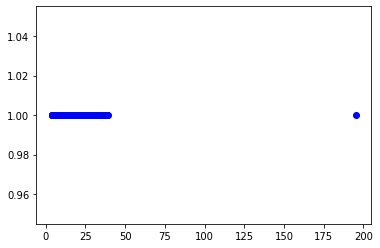

full_sigma [25.27068438  0.          0.         ...  0.          0.
  0.        ]


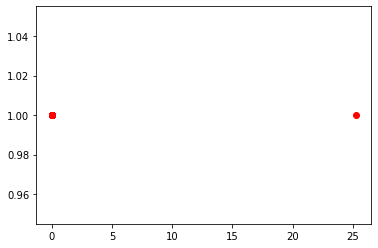

1 error 0.9609177842753794
0.008689029854213763
Sigma [206.70453511  38.40831935  37.85264781  37.50324083  36.73231137
  36.10599892  35.77015904  34.92565952  34.81565056  34.58219571
  34.10822087  33.79816683  33.51936387  32.91099407  32.672108
  32.44742999  32.14324456  31.79196257  31.43649625  31.18966362
  31.09208604  30.85532314  30.56317675  29.87515396  29.72698457
  29.5843874   29.32665771  29.18061257  28.73021023  28.71151907
  28.4112244   28.34761345  28.1143029   27.94099736  27.63526386
  27.22625478  27.1647516   27.13098697  26.89562597  26.4199794
  26.3299475   26.18330936  26.1141578   25.80169067  25.70783624
  25.45976648  25.42624546  25.34246456  24.92625269  24.8778664
  24.54508188  24.37682578  24.31086805  24.01434413  23.9056159
  23.81160868  23.6496564   23.47637864  23.10340859  22.99615142
  22.88951767  22.80704736  22.66106075  22.35101136  22.31241245
  22.17353259  21.97312623  21.65906897  21.47680351  21.30570698
  21.21517246  20.89133237 

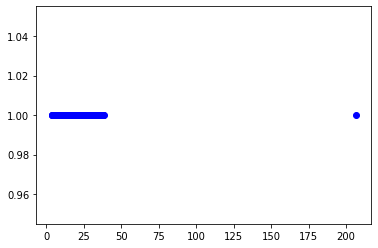

full_sigma [87.66144209  0.          0.         ...  0.          0.
  0.        ]


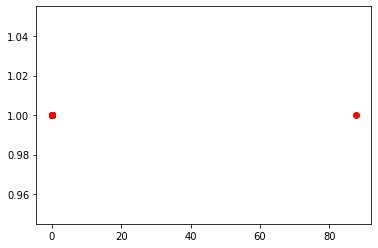

2 error 0.8644773218203907
0.09861654740542129
Sigma [274.10383121  32.55562061  31.8862914   31.38020855  30.85414473
  30.39439945  29.84228345  29.59705993  29.15771574  29.08456274
  28.64669334  28.40092468  28.19233686  27.74977973  27.35124996
  27.30122594  27.11980756  26.78576015  26.3230564   26.20265628
  26.0945026   25.89090867  25.68592336  25.15299584  25.03560853
  24.84718391  24.623695    24.54088492  24.16217465  24.12181865
  23.91138861  23.8561712   23.53762616  23.48951885  23.26931679
  22.91496142  22.81912054  22.76878385  22.70377268  22.37380671
  22.36001217  22.10890166  21.89931673  21.77830377  21.6359354
  21.54510281  21.45061389  21.38817361  21.03778753  20.86269035
  20.64205407  20.59177679  20.42358546  20.1910801   20.15674565
  20.07533094  19.93813019  19.67165093  19.53905102  19.42466383
  19.28132788  19.14565459  19.10346001  18.85714086  18.73940822
  18.61961601  18.48795072  18.18970528  18.15557527  18.01040861
  17.88609905  17.698946

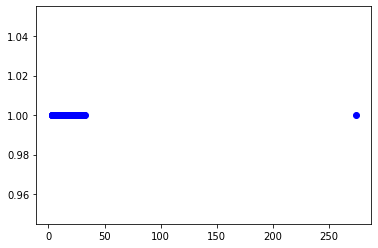

full_sigma [190.7736661   0.          0.        ...   0.          0.
   0.       ]


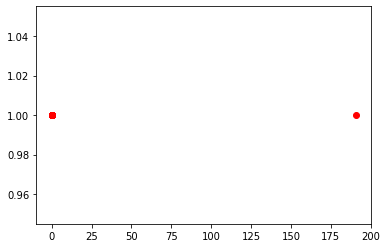

3 error 0.7051053993775451
0.16209391621100455
Sigma [365.18229364  24.75675382  24.02269216  23.28551372  23.03306607
  22.75160279  22.46932316  22.09845677  21.91045216  21.74293976
  21.39565207  21.25073533  21.0205997   20.84554773  20.62688329
  20.35735     20.32618679  20.05459872  19.69430338  19.54408714
  19.39643646  19.25641269  19.13675164  18.9573202   18.86322141
  18.60689791  18.48909503  18.21518565  18.12467491  18.03589409
  17.95357939  17.827443    17.60441864  17.54248683  17.43559471
  17.33411659  17.26896236  17.05252066  16.98386573  16.88068601
  16.75151575  16.60386437  16.44207664  16.32573085  16.32064952
  16.18909854  16.11003486  16.0111723   15.70834335  15.55547246
  15.48946479  15.40042633  15.2644088   15.17998593  15.09622116
  14.99635464  14.88675195  14.755108    14.71396275  14.68397995
  14.45827654  14.36694215  14.14443688  14.12961231  13.96351757
  13.8994875   13.74798568  13.67981915  13.60267556  13.49573033
  13.38770606  13.35484

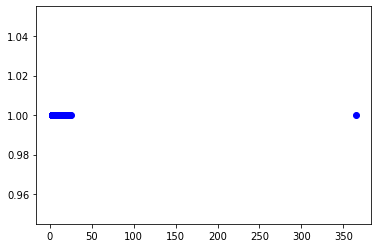

full_sigma [306.85117806   0.           0.         ...   0.           0.
   0.        ]


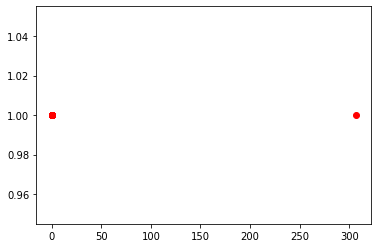

4 error 0.5262417874252355
0.18068127153713895
Sigma [455.39106527  17.08269923  16.42339865  15.81730529  15.6318176
  15.29336038  15.20734013  15.07542597  14.80807965  14.78346971
  14.56115923  14.35499138  14.25766326  14.09018008  13.91896954
  13.86851954  13.70471978  13.56875881  13.37015472  13.26452995
  13.14532783  13.06572949  12.85530332  12.79203358  12.72684337
  12.63740929  12.59211366  12.4310284   12.34373766  12.28790397
  12.16076279  12.08633586  11.945745    11.86601193  11.83866562
  11.7730925   11.69842897  11.56348277  11.51022535  11.44133801
  11.37291454  11.25580592  11.14847744  11.10436856  11.00451644
  10.94135927  10.89055867  10.74108432  10.57142653  10.47934339
  10.4519353   10.42176788  10.31654299  10.21392574  10.19772479
  10.1124928   10.04864507  10.03828799   9.96116077   9.94977375
   9.75603967   9.68589674   9.50503854   9.43528086   9.38792533
   9.28654866   9.25854546   9.17148802   9.11694084   9.09743168
   9.07184653   8.957645

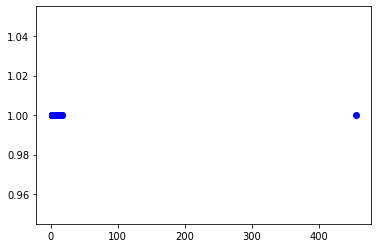

full_sigma [414.55928436   0.           0.         ...   0.           0.
   0.        ]


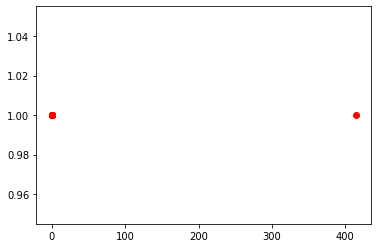

5 error 0.3617946732947253
0.164678501117085
Sigma [529.98727666  10.8722593   10.38751006  10.11699437  10.04965423
   9.77837668   9.68516747   9.53830045   9.42401061   9.32385279
   9.23398125   9.11868603   9.06377175   8.93099667   8.84048995
   8.66400274   8.59724804   8.54181416   8.41082144   8.29104541
   8.23871258   8.2036014    8.14035946   8.05902579   7.99569511
   7.91677303   7.85985806   7.78740877   7.73918339   7.67953047
   7.57232789   7.51467308   7.48887376   7.4073326    7.34076889
   7.29188296   7.21895292   7.20542559   7.19331702   7.1188541
   7.06675668   6.98831654   6.92909424   6.86753994   6.83915827
   6.73937008   6.69674214   6.68664393   6.53726747   6.49073964
   6.48657493   6.45507543   6.42328891   6.36314417   6.28368455
   6.22341431   6.18133316   6.15197677   6.11962386   6.04347888
   6.01167614   5.92358827   5.90323696   5.82458861   5.77950408
   5.73998411   5.73001869   5.66661805   5.61584351   5.57721942
   5.51942786   5.48297868

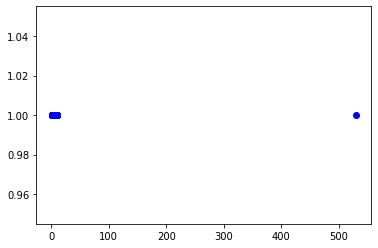

full_sigma [501.40503003   0.           0.         ...   0.           0.
   0.        ]


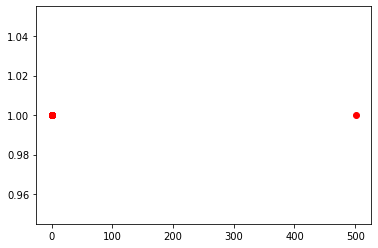

6 error 0.23285728306296982
0.12764069933111036
Sigma [5.83097202e+02 8.22092293e+00 8.09066702e+00 7.55518330e+00
 7.42687338e+00 7.22606438e+00 6.97464269e+00 6.86042487e+00
 6.51406127e+00 6.08754303e+00 5.93100714e+00 5.63461404e+00
 5.54139487e+00 5.50176043e+00 5.37748713e+00 5.28715998e+00
 5.14049781e+00 5.07846459e+00 5.04337370e+00 4.98499844e+00
 4.94738216e+00 4.90071814e+00 4.89342552e+00 4.80791645e+00
 4.76251408e+00 4.75095198e+00 4.69311214e+00 4.65726706e+00
 4.64336499e+00 4.56156798e+00 4.53716522e+00 4.51879026e+00
 4.46479280e+00 4.42008877e+00 4.36147398e+00 4.35162464e+00
 4.31029849e+00 4.30521663e+00 4.27393124e+00 4.25643663e+00
 4.21053910e+00 4.16334315e+00 4.14412882e+00 4.11362352e+00
 4.08079380e+00 4.02727082e+00 4.01114825e+00 3.96436383e+00
 3.94145349e+00 3.89387868e+00 3.88035243e+00 3.85323415e+00
 3.82875052e+00 3.81007826e+00 3.76689198e+00 3.72565307e+00
 3.69084606e+00 3.64560566e+00 3.63867788e+00 3.61770237e+00
 3.60299863e+00 3.54110240e+00 

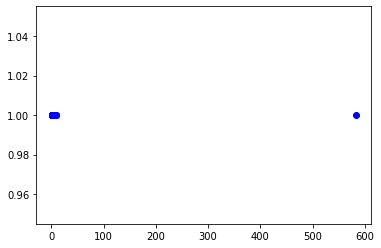

full_sigma [563.08962977   0.           0.         ...   0.           0.
   0.        ]


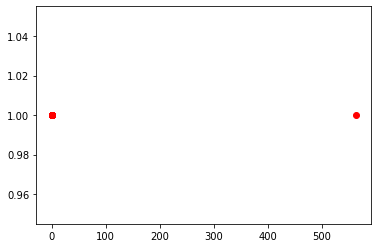

7 error 0.14911384929020355
0.08144084068475566
Sigma [6.15295681e+02 7.79479889e+00 7.69337599e+00 7.01033761e+00
 6.93732600e+00 6.81927442e+00 6.39051235e+00 6.19414132e+00
 5.76665733e+00 5.35477069e+00 4.08208750e+00 3.86839937e+00
 3.79949632e+00 3.77405721e+00 3.72640908e+00 3.64859082e+00
 3.63951775e+00 3.59435000e+00 3.58120380e+00 3.51229990e+00
 3.49195827e+00 3.44457811e+00 3.41772977e+00 3.39440030e+00
 3.32865758e+00 3.31809826e+00 3.30544989e+00 3.27204025e+00
 3.24756438e+00 3.21328476e+00 3.18282554e+00 3.15152555e+00
 3.13539332e+00 3.11613907e+00 3.09058427e+00 3.06528497e+00
 3.04972752e+00 3.00892142e+00 2.99669313e+00 2.96895702e+00
 2.95572096e+00 2.94470467e+00 2.91500775e+00 2.88182164e+00
 2.85904146e+00 2.82570317e+00 2.81140489e+00 2.79146207e+00
 2.76941043e+00 2.76283242e+00 2.74120469e+00 2.70967313e+00
 2.70550146e+00 2.65842488e+00 2.65492160e+00 2.63920623e+00
 2.58674285e+00 2.56702351e+00 2.55898108e+00 2.52062221e+00
 2.51847683e+00 2.50928415e+00 

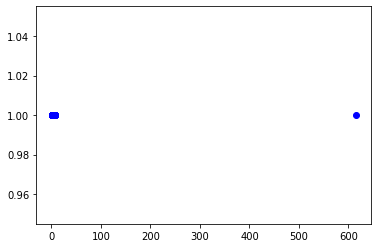

full_sigma [601.29038045   0.           0.         ...   0.           0.
   0.        ]


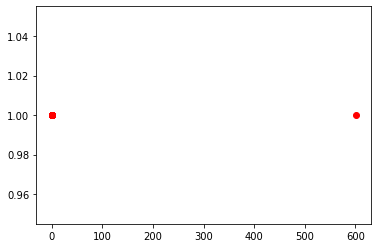

8 error 0.10937908911725862
0.037477761065672084
Sigma [6.30844621e+02 7.76319264e+00 7.66012983e+00 6.99963758e+00
 6.89686431e+00 6.78835493e+00 6.32102964e+00 6.09549960e+00
 5.66190413e+00 5.29848969e+00 3.79384248e+00 3.63209967e+00
 3.60784773e+00 3.56251055e+00 3.51840390e+00 3.43939065e+00
 3.38775711e+00 3.36626603e+00 3.34278894e+00 3.28332771e+00
 3.26759696e+00 3.23893892e+00 3.18936051e+00 3.16035322e+00
 3.13059292e+00 3.11789665e+00 3.04821533e+00 3.00470915e+00
 2.98897418e+00 2.97208239e+00 2.95627795e+00 2.93790529e+00
 2.91947888e+00 2.87671708e+00 2.86187221e+00 2.85047999e+00
 2.83285108e+00 2.78860352e+00 2.78454969e+00 2.76013917e+00
 2.74043999e+00 2.71642835e+00 2.70609448e+00 2.66346113e+00
 2.64615895e+00 2.62664508e+00 2.60090766e+00 2.57816676e+00
 2.56954652e+00 2.53632953e+00 2.52039745e+00 2.49774715e+00
 2.48263728e+00 2.46134298e+00 2.43580503e+00 2.43066682e+00
 2.41354975e+00 2.37738804e+00 2.37381570e+00 2.36450693e+00
 2.30728684e+00 2.30389087e+00

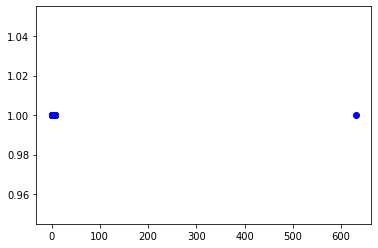

full_sigma [621.04091086   0.           0.         ...   0.           0.
   0.        ]


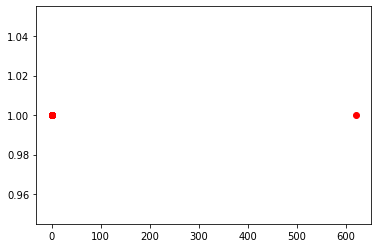

9 error 0.0982046025015038
0.010090887037079688
Sigma [6.35311984e+02 7.77531312e+00 7.66459298e+00 7.03207926e+00
 6.90105137e+00 6.79679603e+00 6.32740338e+00 6.09068841e+00
 5.66287200e+00 5.32856423e+00 3.78141609e+00 3.64941953e+00
 3.59752985e+00 3.57565915e+00 3.52376454e+00 3.46176370e+00
 3.41096719e+00 3.38338480e+00 3.34567028e+00 3.28532495e+00
 3.26958709e+00 3.23558517e+00 3.19115166e+00 3.16615136e+00
 3.14183847e+00 3.11844385e+00 3.06599489e+00 3.03195541e+00
 3.00590091e+00 2.98024785e+00 2.95046970e+00 2.93782766e+00
 2.89776951e+00 2.88232866e+00 2.85736409e+00 2.84880832e+00
 2.83756154e+00 2.79819632e+00 2.78680498e+00 2.77599167e+00
 2.74285075e+00 2.73300055e+00 2.70543132e+00 2.69021569e+00
 2.65861928e+00 2.63530524e+00 2.62435066e+00 2.57278239e+00
 2.55820336e+00 2.52587302e+00 2.51618596e+00 2.50606415e+00
 2.48969894e+00 2.47696518e+00 2.45633061e+00 2.44614697e+00
 2.42013452e+00 2.40023464e+00 2.39425937e+00 2.36310937e+00
 2.32856663e+00 2.30708851e+00 

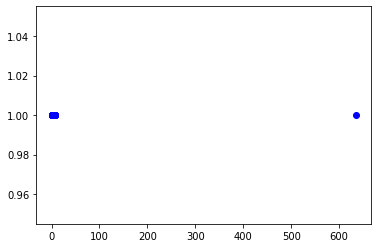

full_sigma [628.44938609   0.           0.         ...   0.           0.
   0.        ]


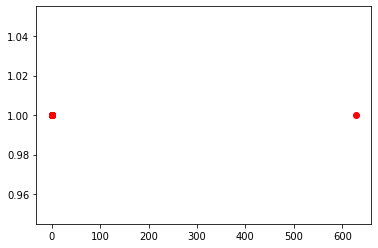

10 error 0.09577268351199852
0.0024411219632763967
Sigma [6.33910667e+02 8.85246356e+00 8.57802729e+00 7.19036543e+00
 6.90185689e+00 6.74558143e+00 6.28774210e+00 6.06326625e+00
 5.61728049e+00 5.31258152e+00 3.67726823e+00 3.58313596e+00
 3.51969697e+00 3.48981321e+00 3.45279161e+00 3.40385673e+00
 3.34487851e+00 3.29951897e+00 3.24737854e+00 3.20151314e+00
 3.18267442e+00 3.14407754e+00 3.12154344e+00 3.10275960e+00
 3.07237878e+00 3.05778357e+00 2.99346663e+00 2.97332788e+00
 2.93289399e+00 2.91736606e+00 2.89504950e+00 2.88696488e+00
 2.84119835e+00 2.83273800e+00 2.79931295e+00 2.79208375e+00
 2.78427372e+00 2.74852285e+00 2.74033749e+00 2.73595038e+00
 2.69205876e+00 2.68337429e+00 2.66006194e+00 2.63541922e+00
 2.60583768e+00 2.58563212e+00 2.56605970e+00 2.51943609e+00
 2.50660621e+00 2.48572978e+00 2.46822205e+00 2.45934650e+00
 2.43220704e+00 2.41507615e+00 2.41032707e+00 2.39098871e+00
 2.37925662e+00 2.36652264e+00 2.33845136e+00 2.31052971e+00
 2.28029222e+00 2.26277996e+

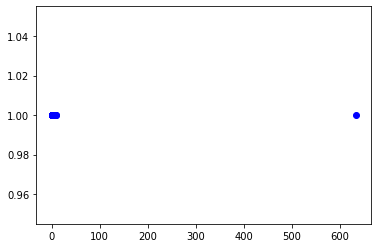

full_sigma [629.10684888   0.           0.         ...   0.           0.
   0.        ]


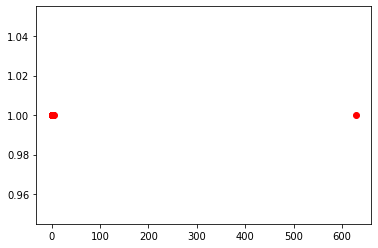

11 error 0.08800647970021318
0.009515659680711903
Sigma [6.30605147e+02 1.19206904e+01 1.14425721e+01 9.48459196e+00
 9.12396187e+00 8.79827262e+00 7.78264657e+00 7.39183565e+00
 6.29199315e+00 5.66561529e+00 3.06292938e+00 3.01000899e+00
 2.92705055e+00 2.91594050e+00 2.88877965e+00 2.84995654e+00
 2.80070121e+00 2.75549967e+00 2.70924496e+00 2.69766740e+00
 2.65312262e+00 2.62556148e+00 2.60680210e+00 2.59758951e+00
 2.56785768e+00 2.52779061e+00 2.50058452e+00 2.49225721e+00
 2.46840357e+00 2.45600353e+00 2.43987000e+00 2.41640818e+00
 2.40262699e+00 2.39007096e+00 2.37596328e+00 2.36267303e+00
 2.32870781e+00 2.32502047e+00 2.30564346e+00 2.29071726e+00
 2.26361411e+00 2.24212111e+00 2.23544080e+00 2.21492442e+00
 2.21078181e+00 2.17744197e+00 2.16318494e+00 2.14705712e+00
 2.12456699e+00 2.11234828e+00 2.09721933e+00 2.07467835e+00
 2.06110939e+00 2.03526744e+00 2.01452925e+00 2.00631212e+00
 1.99797531e+00 1.98377577e+00 1.97654100e+00 1.96562147e+00
 1.92753937e+00 1.91572283e+0

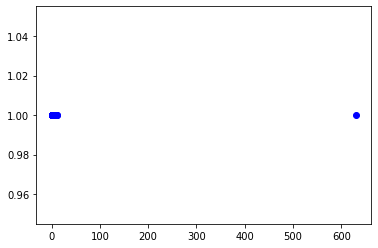

full_sigma [627.24247405   0.           0.         ...   0.           0.
   0.        ]


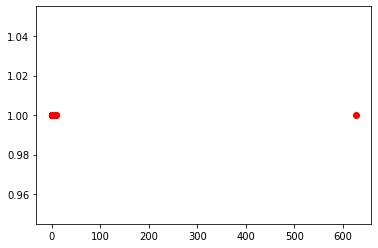

12 error 0.07438334787792675
0.016188797297919177
Sigma [6.27729910e+02 1.55036608e+01 1.48298383e+01 1.25882203e+01
 1.22672690e+01 1.17104344e+01 1.02508119e+01 9.89377368e+00
 8.08827951e+00 7.28696858e+00 2.30685224e+00 2.22587699e+00
 2.19604862e+00 2.15513352e+00 2.13576763e+00 2.11503796e+00
 2.08502271e+00 2.06749272e+00 2.04375347e+00 2.02261398e+00
 1.98815546e+00 1.97137394e+00 1.95336774e+00 1.94390149e+00
 1.92466272e+00 1.90752133e+00 1.88343216e+00 1.85973777e+00
 1.85240278e+00 1.83890522e+00 1.83018193e+00 1.82706209e+00
 1.81048137e+00 1.80783882e+00 1.77915064e+00 1.75896314e+00
 1.74667246e+00 1.74051096e+00 1.73092340e+00 1.71538253e+00
 1.69757967e+00 1.68429702e+00 1.67796076e+00 1.66182240e+00
 1.64091539e+00 1.63557495e+00 1.61557294e+00 1.60201637e+00
 1.59468518e+00 1.58214702e+00 1.57169105e+00 1.56234906e+00
 1.54998388e+00 1.53721246e+00 1.52498366e+00 1.50906801e+00
 1.49416107e+00 1.48791500e+00 1.48153628e+00 1.47842875e+00
 1.45957463e+00 1.44695178e+0

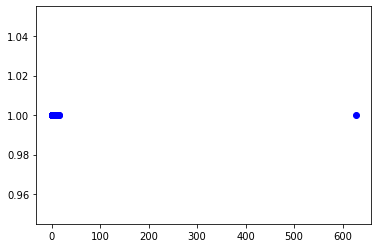

full_sigma [625.37603908   0.           0.         ...   0.           0.
   0.        ]


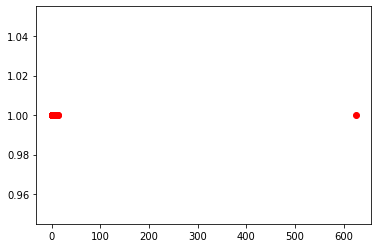

13 error 0.058838264872555335
0.017527133600943774
Sigma [6.26207965e+02 1.86162037e+01 1.78128149e+01 1.56032585e+01
 1.52579176e+01 1.45138220e+01 1.27957709e+01 1.26449014e+01
 1.02057224e+01 9.41588525e+00 1.63035072e+00 1.56702877e+00
 1.53876399e+00 1.52539377e+00 1.50822191e+00 1.48332301e+00
 1.46841857e+00 1.46265107e+00 1.44015948e+00 1.42182615e+00
 1.41248802e+00 1.39412960e+00 1.38117043e+00 1.37599762e+00
 1.36847755e+00 1.35836523e+00 1.34978187e+00 1.34010184e+00
 1.32699871e+00 1.31891756e+00 1.30870557e+00 1.29493574e+00
 1.28851697e+00 1.27277094e+00 1.25341616e+00 1.24816792e+00
 1.23821871e+00 1.22974661e+00 1.22050494e+00 1.20769739e+00
 1.19945120e+00 1.19280732e+00 1.18988592e+00 1.17145841e+00
 1.16401560e+00 1.14868497e+00 1.13970498e+00 1.13788656e+00
 1.13217517e+00 1.12068701e+00 1.11139675e+00 1.10552883e+00
 1.09049934e+00 1.08241255e+00 1.06844194e+00 1.06524550e+00
 1.05745527e+00 1.05299520e+00 1.04508715e+00 1.03557884e+00
 1.03007048e+00 1.02748921e+

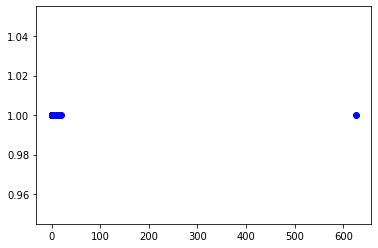

full_sigma [624.56025503   0.           0.         ...   0.           0.
   0.        ]


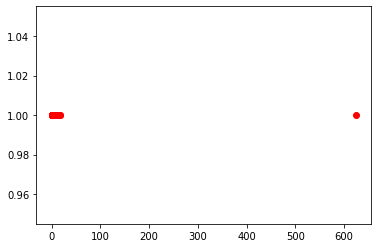

14 error 0.044452439149704245
0.015134828706556639
Sigma [6.26045199e+02 2.08763832e+01 2.00322887e+01 1.80962975e+01
 1.75599660e+01 1.67549029e+01 1.50769751e+01 1.49421150e+01
 1.21484979e+01 1.15160594e+01 1.11601121e+00 1.09047783e+00
 1.08161949e+00 1.04725568e+00 1.04355205e+00 1.02523824e+00
 1.01899424e+00 1.00593632e+00 9.95092296e-01 9.89837859e-01
 9.79462742e-01 9.70058603e-01 9.65363762e-01 9.54777172e-01
 9.50059052e-01 9.37283022e-01 9.28627127e-01 9.21159255e-01
 9.19688656e-01 9.02865772e-01 8.97787849e-01 8.92633349e-01
 8.83533682e-01 8.76177947e-01 8.71327831e-01 8.64267936e-01
 8.60852972e-01 8.55033252e-01 8.42112547e-01 8.38773599e-01
 8.30624060e-01 8.23480416e-01 8.14957688e-01 8.03199539e-01
 7.99261459e-01 7.94386656e-01 7.86968824e-01 7.73742499e-01
 7.71264762e-01 7.68479572e-01 7.61381807e-01 7.58808564e-01
 7.53393239e-01 7.44251635e-01 7.37588723e-01 7.30693832e-01
 7.28642355e-01 7.23628608e-01 7.13407814e-01 7.05162073e-01
 7.03648477e-01 7.00459003e-

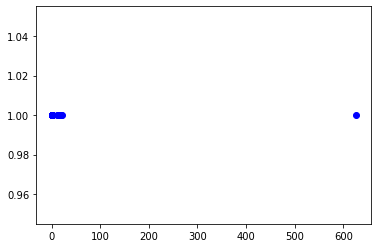

full_sigma [624.89180251   0.           0.         ...   0.           0.
   0.        ]


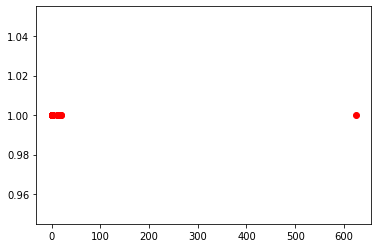

15 error 0.032521660229672844
0.011540185258758823
Sigma [6.26822404e+02 2.23120286e+01 2.14971149e+01 1.98806779e+01
 1.91475100e+01 1.83436573e+01 1.69459221e+01 1.65561784e+01
 1.37024037e+01 1.32983927e+01 7.64165738e-01 7.55227042e-01
 7.42419251e-01 7.28451942e-01 7.14947946e-01 7.11392289e-01
 6.96861326e-01 6.89443038e-01 6.87756565e-01 6.76816348e-01
 6.75565293e-01 6.67489842e-01 6.61002868e-01 6.55160572e-01
 6.47066529e-01 6.36861118e-01 6.32693630e-01 6.30670255e-01
 6.20400817e-01 6.15376405e-01 6.11142545e-01 6.07086151e-01
 5.99825467e-01 5.92350402e-01 5.91094833e-01 5.87977510e-01
 5.81476976e-01 5.73229423e-01 5.72845154e-01 5.69696113e-01
 5.61031946e-01 5.59695031e-01 5.51819730e-01 5.43295789e-01
 5.38121146e-01 5.33663455e-01 5.28173513e-01 5.23744124e-01
 5.22156800e-01 5.18705080e-01 5.17137329e-01 5.14587745e-01
 5.11896629e-01 5.06426920e-01 5.00143828e-01 4.96507673e-01
 4.91784424e-01 4.87710183e-01 4.84043939e-01 4.80884760e-01
 4.75689633e-01 4.73013436e-

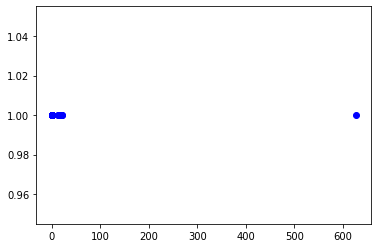

full_sigma [626.01502675   0.           0.         ...   0.           0.
   0.        ]


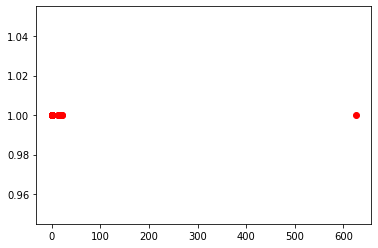

16 error 0.023181515702909383
0.00824284683276993
Sigma [6.28045104e+02 2.31297621e+01 2.23735824e+01 2.10041042e+01
 2.01612891e+01 1.93748194e+01 1.82369461e+01 1.76691365e+01
 1.48363980e+01 1.46526266e+01 5.29914325e-01 5.20866823e-01
 5.13150087e-01 5.01200632e-01 4.93090749e-01 4.84935261e-01
 4.79786474e-01 4.75166786e-01 4.67818695e-01 4.64978535e-01
 4.62655473e-01 4.57022243e-01 4.51027809e-01 4.45255141e-01
 4.41708112e-01 4.32917509e-01 4.25847508e-01 4.23459808e-01
 4.19811842e-01 4.16059866e-01 4.13996829e-01 4.11987349e-01
 4.05029424e-01 4.04523869e-01 4.00235323e-01 3.98377805e-01
 3.92696209e-01 3.90895069e-01 3.86618470e-01 3.81224303e-01
 3.79916057e-01 3.78146541e-01 3.72323510e-01 3.68447784e-01
 3.65453777e-01 3.60967434e-01 3.60193671e-01 3.58843536e-01
 3.54967708e-01 3.50398424e-01 3.48419007e-01 3.46035508e-01
 3.44355520e-01 3.36639064e-01 3.35108287e-01 3.33834124e-01
 3.27588430e-01 3.26666107e-01 3.24629876e-01 3.21376574e-01
 3.18759608e-01 3.16369756e-0

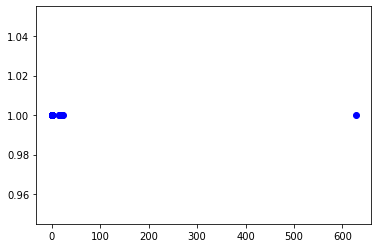

full_sigma [627.47993954   0.           0.         ...   0.           0.
   0.        ]


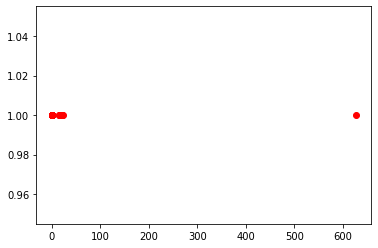

17 error 0.01613790550520147
0.005667956915512565
Sigma [6.29324988e+02 2.35556404e+01 2.28490458e+01 2.16206079e+01
 2.07712913e+01 2.00004512e+01 1.90388045e+01 1.83818105e+01
 1.56514312e+01 1.55408755e+01 3.78259840e-01 3.62120973e-01
 3.61440655e-01 3.51223392e-01 3.43373027e-01 3.37822059e-01
 3.36287365e-01 3.31773580e-01 3.22876805e-01 3.19449295e-01
 3.16739339e-01 3.10806148e-01 3.08823372e-01 3.04934604e-01
 2.99478265e-01 2.97377474e-01 2.96179618e-01 2.93662900e-01
 2.90963078e-01 2.86820635e-01 2.83104522e-01 2.79550682e-01
 2.78867827e-01 2.77492167e-01 2.74028321e-01 2.69672527e-01
 2.67797041e-01 2.66952478e-01 2.64584665e-01 2.63095569e-01
 2.58454283e-01 2.55785420e-01 2.52694424e-01 2.50320247e-01
 2.49382919e-01 2.46676633e-01 2.45543937e-01 2.44818095e-01
 2.42982381e-01 2.41942218e-01 2.37682075e-01 2.35328038e-01
 2.34432220e-01 2.31832086e-01 2.28237171e-01 2.26138509e-01
 2.24068593e-01 2.21359445e-01 2.19999086e-01 2.19184484e-01
 2.15823850e-01 2.14472946e-0

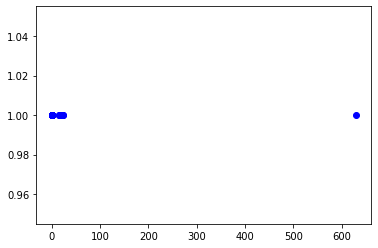

full_sigma [628.92937323   0.           0.         ...   0.           0.
   0.        ]


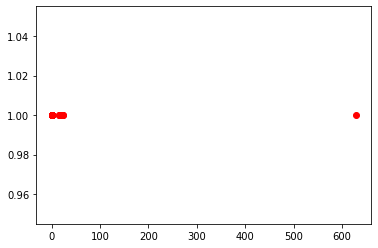

18 error 0.011057114139962274
0.0037171009656570574
13.56132197380066


In [ ]:
z=np.random.rand ( (n1*n2))
time1=time.time()
X_new = main_loop(z, beta=1, mu=0.0001*mu0, loop_size=20)
print(time.time() - time1 )

In [ ]:
np.linalg.matrix_rank(X_new)

1